In [265]:
#Importing Libraries
import numpy as np
import json 
from geopy.geocoders import Nominatim
import requests 
from bs4 import BeautifulSoup 
from pandas.io.json import json_normalize 
import matplotlib as plt_mat
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
print("Libraries imported.")

Libraries imported.


In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
data = requests.get("https://en.wikipedia.org/wiki/List_of_shopping_malls_in_India").text
data

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of shopping malls in India - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"3fd11eb3-0678-4832-9997-0b9ede5b845a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_shopping_malls_in_India","wgTitle":"List of shopping malls in India","wgCurRevisionId":968006460,"wgRevisionId":968006460,"wgArticleId":5287845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: unfit url","Articles with short description","Short descriptio

In [76]:
soup = BeautifulSoup(data, 'html.parser')
mall = []

tbl1 = soup.find("table", class_ ="wikitable")

cols=[]
list1 = []

for row in tbl1.find_all("tr"):
    for td in row.find_all('td'):
        list1.append(td.text.strip("\n"))
    cols.append(list1)
    list1 = []
cols


[[],
 ['DLF Mall of India',
  'Noida',
  '2016',
  '2,000,000\xa0sq\xa0ft (190,000\xa0m2)',
  '[1][2]'],
 ['Sarath City Capital Mall',
  'Hyderabad',
  '2018',
  '1,931,000\xa0sq\xa0ft (179,400\xa0m2)',
  '[3]'],
 ['Ambience Mall Gurgaon',
  'Gurgaon',
  '2007',
  '1,800,000\xa0sq\xa0ft (170,000\xa0m2)',
  '[4][5]'],
 ['DB City Mall, Bhopal',
  'Bhopal',
  '2010',
  '1,300,000\xa0sq\xa0ft (120,000\xa0m2)',
  '[6]'],
 ['World Trade Park, Jaipur',
  'Jaipur',
  '2012',
  '1,300,000\xa0sq\xa0ft (120,000\xa0m2)',
  '[7]'],
 ['Ambience Mall, Vasant Kunj',
  'Delhi',
  '2008',
  '1,200,000\xa0sq\xa0ft (110,000\xa0m2)',
  '[8]'],
 ['R City Mall',
  'Mumbai',
  '2009',
  '1,200,000\xa0sq\xa0ft (110,000\xa0m2)',
  '[9][10][11]'],
 ['Phoenix Marketcity (Pune)',
  'Pune',
  '2011',
  '1,190,000\xa0sq\xa0ft (111,000\xa0m2)',
  '[12][13]'],
 ['Elante Mall',
  'Chandigarh',
  '2013',
  '1,150,000\xa0sq\xa0ft (107,000\xa0m2)',
  '[14][15]'],
 ['Phoenix Marketcity (Mumbai)',
  'Mumbai',
  '2011',
  '1

In [87]:
df = pd.DataFrame(cols)
del df[4]
print(df)

df[1].value_counts()


                                                    0                   1  \
0                                                None                None   
1                                   DLF Mall of India               Noida   
2                            Sarath City Capital Mall           Hyderabad   
3                               Ambience Mall Gurgaon             Gurgaon   
4                                DB City Mall, Bhopal              Bhopal   
5                            World Trade Park, Jaipur              Jaipur   
6                          Ambience Mall, Vasant Kunj               Delhi   
7                                         R City Mall              Mumbai   
8                           Phoenix Marketcity (Pune)                Pune   
9                                         Elante Mall          Chandigarh   
10                        Phoenix Marketcity (Mumbai)              Mumbai   
11                              The Great India Place               Noida   

Delhi                 8
Chennai               6
Bengaluru             6
Mumbai                5
Greater Noida         5
Kolkata               4
Gurgaon               3
Kochi                 3
Hyderabad             3
Noida                 3
Amritsar              2
Ghaziabad             2
Lucknow               2
New Town, Kolkata     2
Bhubaneswar           1
Coimbatore            1
Jaipur                1
Ahmedabad             1
Howrah                1
Kozhikode             1
Thiruvananthapuram    1
Mangaluru             1
Chandigarh            1
Faridabad             1
Dombivali             1
Mangalore             1
Kanpur                1
Aurangabad            1
Jamshedpur            1
Navi Mumbai           1
Hadapsar, Pune        1
Siliguri              1
Pune                  1
Sonipat               1
Bhopal                1
Mohali                1
Thane                 1
Nashik                1
Kalyan                1
Surat                 1
Name: 1, dtype: int64

In [97]:
#top 5
df = df.rename(columns={"newName1": 'Mall Name', 1: 'City', "newName2": 'Year', 3: 'size'})
df.head()

,Mall Name,City,Year,size
0,None,None,None,None
1,DLF Mall of India,Noida,2016,"2,000,000 sq ft (190,000 m2)"
2,Sarath City Capital Mall,Hyderabad,2018,"1,931,000 sq ft (179,400 m2)"
3,Ambience Mall Gurgaon,Gurgaon,2007,"1,800,000 sq ft (170,000 m2)"
4,"DB City Mall, Bhopal",Bhopal,2010,"1,300,000 sq ft (120,000 m2)"


In [98]:
#bottom 5

df.tail()

,Mall Name,City,Year,size
76,"Gold Souk Grande, Kochi",Kochi,2011,"500,000 sq ft (46,000 m2)"
77,MSX Mall,Greater Noida,2013,"500,000 sq ft (46,000 m2)"
78,"Unity One, Janakpuri",Delhi,2015,"500,000 sq ft (46,000 m2)"
79,Lodha Xperia Mall,Dombivali,2016,"500,000 sq ft (46,000 m2)"
80,Prozone Mall (Coimbatore),Coimbatore,2017,"500,000 sq ft (46,000 m2)"


In [140]:
#shape 

df.shape

df.drop(df.index[0])


,Mall Name,City,Year,size
1,DLF Mall of India,Noida,2016,"2,000,000 sq ft (190,000 m2)"
2,Sarath City Capital Mall,Hyderabad,2018,"1,931,000 sq ft (179,400 m2)"
3,Ambience Mall Gurgaon,Gurgaon,2007,"1,800,000 sq ft (170,000 m2)"
4,"DB City Mall, Bhopal",Bhopal,2010,"1,300,000 sq ft (120,000 m2)"
5,"World Trade Park, Jaipur",Jaipur,2012,"1,300,000 sq ft (120,000 m2)"
6,"Ambience Mall, Vasant Kunj",Delhi,2008,"1,200,000 sq ft (110,000 m2)"
7,R City Mall,Mumbai,2009,"1,200,000 sq ft (110,000 m2)"
8,Phoenix Marketcity (Pune),Pune,2011,"1,190,000 sq ft (111,000 m2)"
9,Elante Mall,Chandigarh,2013,"1,150,000 sq ft (107,000 m2)"
10,Phoenix Marketcity (Mumbai),Mumbai,2011,"1,140,000 sq ft (106,000 m2)"


In [145]:
# latitude and longitude of values  
longitude = [] 
latitude = [] 
 
def findGeocode(city): 
    try: 
        geolocator = Nominatim(user_agent="capston") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
# each value from city column 
# will be fetched and sent to 
for i in (df["City"]):
    if findGeocode(i) != None: 
        loc = findGeocode(i) 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [146]:
df["Longitude"] = longitude 
df["Latitude"] = latitude 
df 

,Mall Name,City,Year,size,Longitude,Latitude
0,None,None,None,None,7.540121,44.933143
1,DLF Mall of India,Noida,2016,"2,000,000 sq ft (190,000 m2)",77.391073,28.535633
2,Sarath City Capital Mall,Hyderabad,2018,"1,931,000 sq ft (179,400 m2)",78.474629,17.361608
3,Ambience Mall Gurgaon,Gurgaon,2007,"1,800,000 sq ft (170,000 m2)",77.002700,28.428262
4,"DB City Mall, Bhopal",Bhopal,2010,"1,300,000 sq ft (120,000 m2)",77.401989,23.258486
5,"World Trade Park, Jaipur",Jaipur,2012,"1,300,000 sq ft (120,000 m2)",75.820349,26.916194
6,"Ambience Mall, Vasant Kunj",Delhi,2008,"1,200,000 sq ft (110,000 m2)",77.221939,28.651718
7,R City Mall,Mumbai,2009,"1,200,000 sq ft (110,000 m2)",72.835335,18.938771
8,Phoenix Marketcity (Pune),Pune,2011,"1,190,000 sq ft (111,000 m2)",73.854454,18.521428
9,Elante Mall,Chandigarh,2013,"1,150,000 sq ft (107,000 m2)",76.779714,30.733442


In [148]:
address = 'india'
geolocator = Nominatim(user_agent="Capston")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India 22.3511148, 78.6677428.


In [163]:
# number of city
# of Mall in city
data_count = df["City"].value_counts()

df_city = pd.DataFrame(data_count)
df_city

,City
Delhi,8
Chennai,6
Bengaluru,6
Mumbai,5
Greater Noida,5
Kolkata,4
Gurgaon,3
Kochi,3
Hyderabad,3
Noida,3


Text(0.5, 1.0, 'COVID 19 in Tamil Nadu')

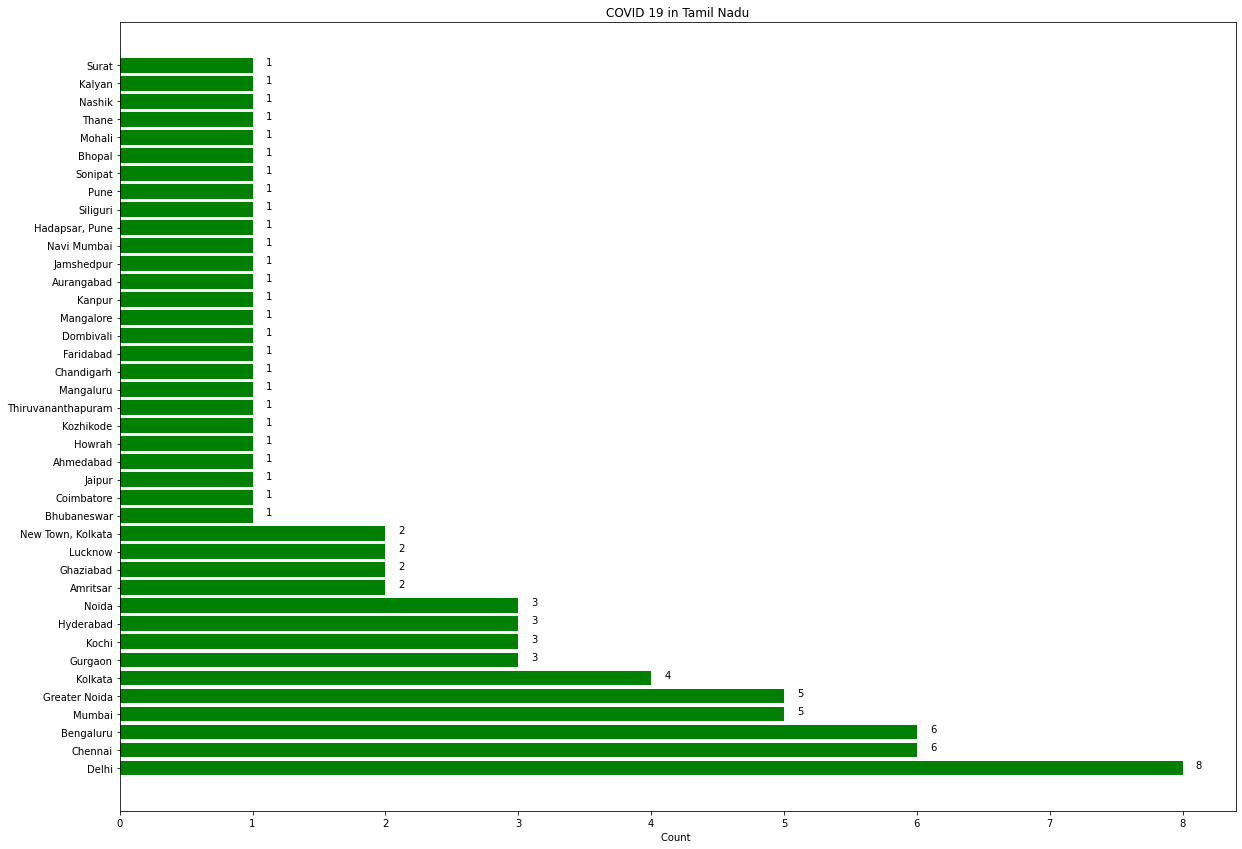

In [308]:
fig, ax = plt.subplots()
color = ["green"] 
plt.gcf().subplots_adjust(bottom=0.15)
plt.rcParams["figure.figsize"] = (20,15)
ax.barh(df_city.index,df_city.City, align='center',color = color)
for i, v in enumerate(df_city.City):
    ax.text(v + 0.10 , i + .0, str(v), color='black', fontweight='100')
ax.set_xlabel('Count ')
ax.set_title('COVID 19 in Tamil Nadu')

##### ** according to above plot observation the city delhi will have the higest count of shopping malls in india

In [309]:
map_kl = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['City']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

In [310]:
map_clusters.save('map_before_cluster.html')

In [236]:
CLIENT_ID = 'Go and get id from Foursquare' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [238]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['City']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [241]:

# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['City', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df

(3887, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,None,44.933143,7.540121,La Corte,44.935052,7.540480,Italian Restaurant
1,None,44.933143,7.540121,Telefonone,44.933260,7.538620,Mobile Phone Shop
2,None,44.933143,7.540121,Caffè Cavour,44.933135,7.540934,Café
3,None,44.933143,7.540121,Cult Cafè,44.933337,7.540134,Café
4,None,44.933143,7.540121,Stazione None,44.937877,7.540119,Train Station
5,None,44.933143,7.540121,Pulcinella,44.931871,7.530406,Pizza Place
6,None,44.933143,7.540121,La Riserva,44.921674,7.525152,Trail
7,Noida,28.535633,77.391073,Aureo,28.533663,77.387710,Diner
8,Noida,28.535633,77.391073,Domino's Pizza,28.534000,77.387000,Pizza Place
9,Noida,28.535633,77.391073,Pizza Hut,28.533973,77.388030,Pizza Place


In [242]:
venues_df["VenueCategory"].value_counts()

Indian Restaurant                 532
Hotel                             314
Café                              203
Fast Food Restaurant              145
Pizza Place                       104
Restaurant                         94
Coffee Shop                        93
Ice Cream Shop                     86
Bakery                             82
Snack Place                        72
Dessert Shop                       71
Lounge                             70
Chinese Restaurant                 67
Shopping Mall                      64
Italian Restaurant                 56
Asian Restaurant                   52
Bar                                51
Multiplex                          47
Market                             46
Nightclub                          43
Clothing Store                     41
Vegetarian / Vegan Restaurant      40
Seafood Restaurant                 39
Train Station                      38
Sandwich Place                     36
Pub                                35
Breakfast Sp

In [243]:
venues_df.groupby(["City"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
City,,,,,,
Ahmedabad,45,45,45,45,45,45
Amritsar,72,72,72,72,72,72
Aurangabad,12,12,12,12,12,12
Bengaluru,600,600,600,600,600,600
Bhopal,6,6,6,6,6,6
Bhubaneswar,23,23,23,23,23,23
Chandigarh,54,54,54,54,54,54
Chennai,324,324,324,324,324,324
Coimbatore,89,89,89,89,89,89


In [244]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 195 uniques categories.


In [246]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['City'] = venues_df['City'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(3887, 195)


,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Bengali Restaurant,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Business Center,Café,Camera Store,Campground,Casino,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [248]:
kl_grouped = kl_onehot.groupby(["City"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped

(38, 195)


,City,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Bengali Restaurant,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Business Center,Café,Camera Store,Campground,Casino,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Resort,Rest Area,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Ahmedabad,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.066667,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.022222,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.088889,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.044444,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.177778,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.00,0.00,0.000000,0.000000,0.022222,0.000000,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.044444,0

In [249]:
len(kl_grouped[kl_grouped["Shopping Mall"] > 0])

21

In [252]:
kl_mall = kl_grouped[["City","Shopping Mall"]]
kl_mall.head()

,City,Shopping Mall
0,Ahmedabad,0.044444
1,Amritsar,0.027778
2,Aurangabad,0.083333
3,Bengaluru,0.010000
4,Bhopal,0.000000


### the above result will be the venues near the city

In [257]:
# set number of clusters
kclusters = 3

kl_clustering = kl_mall.drop(["City"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 2, 2, 0, 2, 2, 2, 2])

In [258]:
kl_merged = kl_mall.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [259]:
kl_merged.rename(columns={"City": "City"}, inplace=True)
kl_merged.head()

,City,Shopping Mall,Cluster Labels
0,Ahmedabad,0.044444,2
1,Amritsar,0.027778,2
2,Aurangabad,0.083333,0
3,Bengaluru,0.010000,2
4,Bhopal,0.000000,2


In [262]:
l_merged = kl_merged.join(df.set_index("City"), on="City")

print(kl_merged.shape)
kl_merged.head()

(38, 3)


,City,Shopping Mall,Cluster Labels
0,Ahmedabad,0.044444,2
1,Amritsar,0.027778,2
2,Aurangabad,0.083333,0
3,Bengaluru,0.010000,2
4,Bhopal,0.000000,2


In [263]:
print(kl_merged.shape)
kl_merged.sort_values(["Cluster Labels"], inplace=True)
kl_merged

(38, 3)


,City,Shopping Mall,Cluster Labels
2,Aurangabad,0.083333,0
25,Lucknow,0.074074,0
16,Howrah,0.062500,0
5,Bhubaneswar,0.086957,0
13,Greater Noida,0.100000,0
11,Faridabad,0.120000,0
29,Nashik,0.500000,1
12,Ghaziabad,0.333333,1
0,Ahmedabad,0.044444,2
24,Kozhikode,0.016667,2


In [268]:
kl_merged['Latitude'] = latitude

kl_merged['Longitude'] = longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['City'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [269]:
map_clusters.save('map_a.html')

In [300]:
print(kl_merged.loc[kl_merged['Cluster Labels'] == 0].mean())
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

Shopping Mall      0.087811
Cluster Labels     0.000000
Latitude          22.351115
Longitude         78.667743
dtype: float64


,City,Shopping Mall,Cluster Labels,Latitude,Longitude
2,Aurangabad,0.083333,0,22.351115,78.667743
25,Lucknow,0.074074,0,22.351115,78.667743
16,Howrah,0.062500,0,22.351115,78.667743
5,Bhubaneswar,0.086957,0,22.351115,78.667743
13,Greater Noida,0.100000,0,22.351115,78.667743
11,Faridabad,0.120000,0,22.351115,78.667743


In [306]:
print(kl_merged.loc[kl_merged['Cluster Labels'] == 1].mean())
kl_merged.loc[kl_merged['Cluster Labels'] == 1]

Shopping Mall      0.416667
Cluster Labels     1.000000
Latitude          22.351115
Longitude         78.667743
dtype: float64


,City,Shopping Mall,Cluster Labels,Latitude,Longitude
29,Nashik,0.500000,1,22.351115,78.667743
12,Ghaziabad,0.333333,1,22.351115,78.667743


In [305]:
print(kl_merged.loc[kl_merged['Cluster Labels'] == 2].mean())
kl_merged.loc[kl_merged['Cluster Labels'] == 2]

Shopping Mall      0.010275
Cluster Labels     2.000000
Latitude          22.351115
Longitude         78.667743
dtype: float64


,City,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Ahmedabad,0.044444,2,22.351115,78.667743
24,Kozhikode,0.016667,2,22.351115,78.667743
26,Mangalore,0.020000,2,22.351115,78.667743
27,Mangaluru,0.020000,2,22.351115,78.667743
28,Mumbai,0.000000,2,22.351115,78.667743
30,Navi Mumbai,0.017241,2,22.351115,78.667743
31,"New Town, Kolkata",0.000000,2,22.351115,78.667743
32,Noida,0.000000,2,22.351115,78.667743
33,Pune,0.000000,2,22.351115,78.667743
34,Siliguri,0.000000,2,22.351115,78.667743


Opening a new shooping mall in india will help the  Property developers to get more profit. in this the cluster 2 is low cluster value. the cluster 1 is modrate cluster value. the cluster 0 is more cluste value. according to the above analysis the project recommend to open new shopping mall in area of cluster 2 